# Gahan Saraiya (18MCEC10)
---

# SVM

**AIM: Support Vector Machine(SVM) using linear and polynomial kernel**

---

Svm classifier mostly used in addressing multi-classification problems.
Multi-classification problem means having more that 2 target classes to predict.

In [1]:
# Import built-in modules
import os
import numpy as np # linear algebra
import itertools
from subprocess import check_output
from collections import Counter

In [2]:
# Import 3rd party Python packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt #for plotting
from sklearn import linear_model, exceptions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# dividing into train and test
from sklearn.model_selection import train_test_split
import seaborn as sns
# print(check_output(["ls", "input"]).decode("utf8"))
# %matplotlib inline

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

#define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

#define a function plot the decision boundaries
def plot_predictions(clf, axes):
    #create data in continous linear space
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [4]:
d = datasets.load_iris()
iris = pd.DataFrame(d.data, columns=d.feature_names)
iris['target'] = d['target']
iris['label'] = iris.target.replace(dict(enumerate(d.target_names)))
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The 4 features are

- SepalLength (Cm)  
- SepalWidth (Cm)  
- PetalLength (Cm)  
- PetalWidth (Cm)  

---

The flower species type is the target class and it having 3 types

- Setosa  
- Versicolor  
- Virginica  

In [6]:
#print(iris)
X = d.data[:, :2]  # petal length, petal width
#print(X)

y = d['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X = X_train
# y = y_train
# setosa_or_versicolor = (y == 0) | (y == 1)
# X = X[setosa_or_versicolor]
# y = y[setosa_or_versicolor]

`multi-class` parameter determines the multi-class strategy if the data contains more than two classes.

`ovr` - `One-vs-the-rest (OvR)` multiclass/multilabel strategy. Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes  

`ovo` - `one-vs-one`

In [7]:

# SVM Classifier model
#the hyperparameter control the margin violations
#smaller C leads to more margin violations but wider street
#C can be inferred
svm_clf = SVC(kernel="linear", 
              C=1.0,
              tol=0.0001,
              max_iter=10**9,
              decision_function_shape="ovr"
             )
svm_clf.fit(X_train, y_train)

# svm_clf.predict([[2.4, 3.1]])

#SVM classifiers do not output a probability like logistic regression classifiers

print('Accuracy of linear SVC on training set: {:.4f}'.format(svm_clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.4f}'.format(svm_clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.8250
Accuracy of linear SVC on test set: 0.8000


In [8]:
svm_clf = SVC(kernel="linear", 
              C=1.0,
              tol=0.0001,
              max_iter=10**9,
              decision_function_shape="ovo"
             )
svm_clf.fit(X_train, y_train)

# svm_clf.predict([[2.4, 3.1]])

#SVM classifiers do not output a probability like logistic regression classifiers

print('Accuracy of linear SVC on training set: {:.4f}'.format(svm_clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.4f}'.format(svm_clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.8250
Accuracy of linear SVC on test set: 0.8000


[-2, 2, -2, 2]

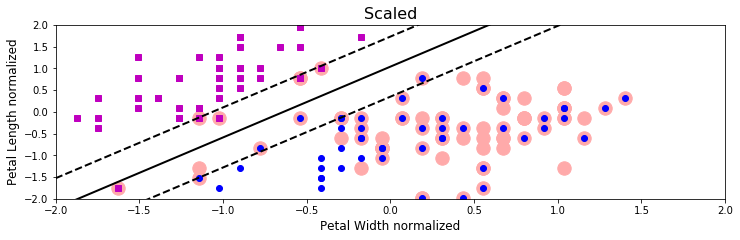

In [9]:
#plot the decision boundaries
plt.figure(figsize=(12,3.2))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled, y)

plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

## Polynomial kernel

When multi-class is 'crammer_singer' it optimizes a joint objective over all classes.

In [10]:
poly_svc = SVC(kernel="poly",
               C=1.0,
               tol=0.0001,
               max_iter=10**9,
               gamma='auto',
               decision_function_shape="ovr"
              )
poly_svc.fit(X_train, y_train)

# svm_clf.predict([[2.4, 3.1]])

#SVM classifiers do not output a probability like logistic regression classifiers

print('Accuracy of linear SVC on training set: {:.4f}'.format(poly_svc.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.4f}'.format(poly_svc.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.8250
Accuracy of linear SVC on test set: 0.8000


## Working with `make_moons` datasets

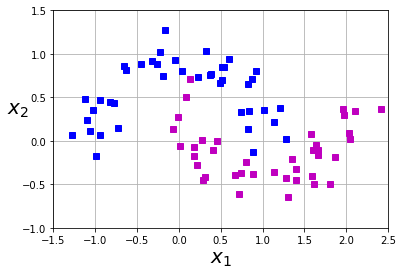

In [11]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
#Let's have a look at the data we have generated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.show()

In [12]:
#C controls the width of the street
#Degree of data

#create a pipeline to create features, scale data and fit the model
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5, max_iter=10**9, gamma="auto")) 
))

#call the pipeline
polynomial_svm_clf.fit(X_train,y_train)


print('Accuracy of linear SVC on training set: {:.2f}'.format(polynomial_svm_clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(polynomial_svm_clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 1.00


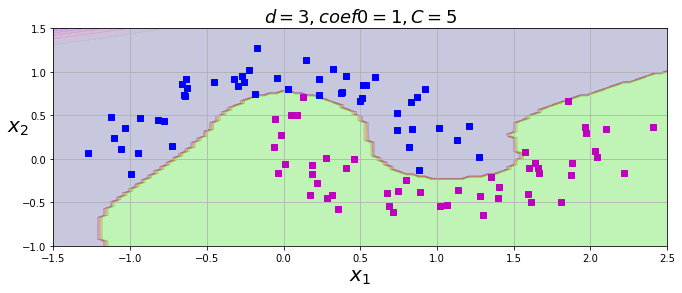

In [13]:
#plot the decision boundaries
plt.figure(figsize=(11, 4))

#plot the decision boundaries
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

#plot the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, coef0=1, C=5$", fontsize=18)
plt.show()